In [5]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *

In [6]:
d = pd.read_csv('../Census-Income-KDD.csv')
d.shape

(199523, 42)

In [7]:
# show the N best params for all the files in the /results folder
N = 5
METRIC = 'f1_macro'
ignore_keys = ['random_seed', 'random_state', 'verbose', 'cat_features', 'dual']
for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        print('='*20+file+'='*20)
        df = read_results('./results/'+file)
        df.sort_values(by=[METRIC], inplace=True, ascending=False)
        res_metric = pd.DataFrame(df[METRIC][:N])
        prep_p = pd.DataFrame(df['prep_param'][:N])
        mod_p = pd.DataFrame(df['model_param'][:N])

        prep_p, mod_p = expand_dicts(prep_p), expand_dicts(mod_p)
        for key in ignore_keys:
            if key in mod_p.columns:
                mod_p.drop(columns=[key], inplace=True)
        print('Best results:')
        print(res_metric.T)
        print('Preprocessing best params:')
        print(prep_p.T)
        print('Model best params:')
        print(mod_p.T)

====================results_catboost.csv====================
Best results:
                0         1         2         3         4
f1_macro  0.79902  0.798776  0.798537  0.798471  0.798331
Preprocessing best params:
                          0       1       2       3       4
scaling                None    None    None    None    None
imputation             mode    mode    mode    mode    mode
cat_age               False   False   False   False   False
remove_outliers       False   False    True    True   False
merge_capital         False   False   False    True   False
downsampling_method  random  random  random  random  random
target_freq            0.85    0.85    0.85    0.85    0.85
generate_dummies      False   False   False   False   False
remove_duplicates      True    True    True    True    True
Model best params:
                     0        1        2        3        4
iterations         750      750      750      750      750
depth                6        6        6     

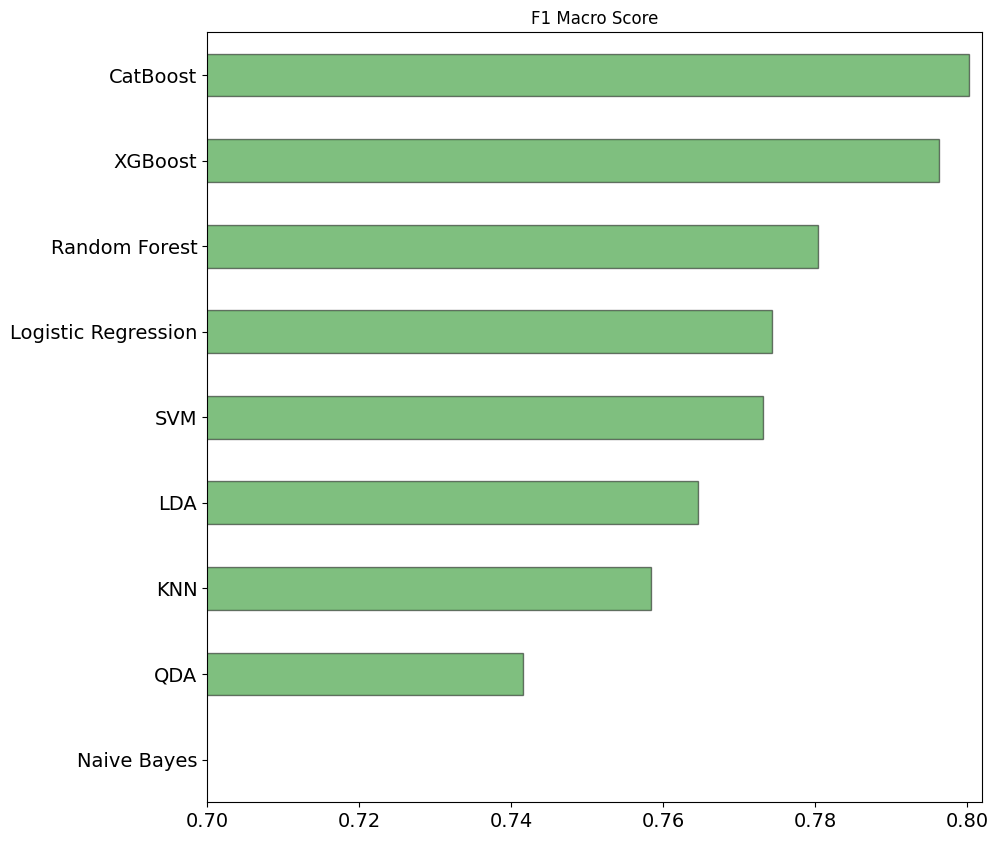

<Figure size 640x480 with 0 Axes>

In [13]:
model_names = {
    'nb': 'Naive Bayes',
    'lda': 'LDA',
    'qda': 'QDA',
    'knn': 'KNN',
    'logreg': 'Logistic Regression',
    'svm': 'SVM',
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'catboost': 'CatBoost',
}

best_f1 = pd.read_csv('./results/cv20_results.csv', index_col=0)

# change the index to the model name
best_f1.index = [model_names[i] for i in best_f1.index]

# plot the f1_macro column in ascending order
best_f1.sort_values(by='f1_macro', inplace=True)
best_f1.plot.barh(y='f1_macro', figsize=(10, 10), title='F1 Macro Score', xlim=(0.7, 0.802), legend=False, fontsize=14, color='green', alpha=0.5, edgecolor='black')
plt.show()
#save the plot
plt.savefig('./figures/best_f1_macro.pdf', bbox_inches='tight')